In [ ]:
import tensorflow as tf
import keras
from tensorflow import keras
import h5py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

%matplotlib inline

In [ ]:
# import the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


In [ ]:
# normalize train and test images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
w, h = 32, 32
x_train = x_train.reshape(x_train.shape[0], w, h, 3)
x_test = x_test.reshape(x_test.shape[0], w, h, 3)

y_tr_org = np.copy(y_train)
y_tst_org = np.copy(y_test)

# employ one hot encoding for class labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# build 2D CNN classifier model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size= (3,3), activation='relu', input_shape=(32,32,3))) 
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
# compile the model
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
cnn = model.fit(x_train, y_train, batch_size=128, epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
391/391 [==============================] - 17s 18ms/step - loss: 2.1187 - accuracy: 0.2127 - val_loss: 1.9189 - val_accuracy: 0.3178
Epoch 2/100
391/391 [==============================] - 6s 15ms/step - loss: 1.8772 - accuracy: 0.3042 - val_loss: 1.7449 - val_accuracy: 0.3793
Epoch 3/100
391/391 [==============================] - 6s 15ms/step - loss: 1.7580 - accuracy: 0.3504 - val_loss: 1.6696 - val_accuracy: 0.3912
Epoch 4/100
391/391 [==============================] - 6s 15ms/step - loss: 1.6771 - accuracy: 0.3853 - val_loss: 1.5858 - val_accuracy: 0.4268
Epoch 5/100
391/391 [==============================] - 6s 15ms/step - loss: 1.6115 - accuracy: 0.4089 - val_loss: 1.5162 - val_accuracy: 0.4535
Epoch 6/100
391/391 [==============================] - 6s 15ms/step - loss: 1.5559 - accuracy: 0.4317 - val_loss: 1.4625 - val_accuracy: 0.4771
Epoch 7/100
391/391 [==============================] - 6s 15ms/step - loss: 1.5161 - accuracy: 0.4492 - val_loss: 1.4323 - val_accuracy

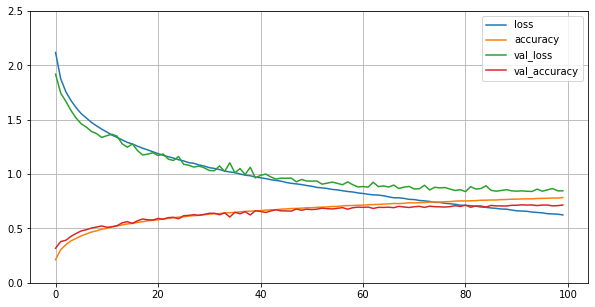

In [ ]:
# plot the curves of loss and accuracy during the training
pd.DataFrame(cnn.history).plot(figsize=(10, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

According to the loss curves, this model is overfitting. The training loss continues to decrease, but the validation loss decreases to a point (around 70th epoch) and then fluctuates around at 0.85 loss.

In [ ]:
# save the model
model.save("CNN_CIFAR10.h5")

In [ ]:
# evaluate the model on test data
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
cm = confusion_matrix(y_tst_org, y_pred)

Text(0.5, 15.0, 'Predicted label')

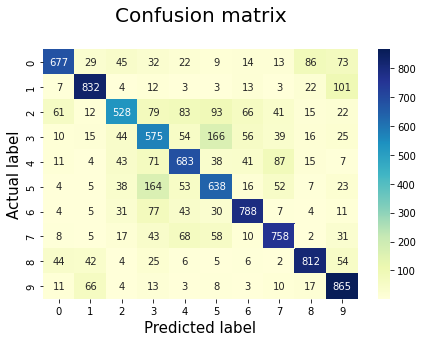

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 20)
plt.ylabel('Actual label',fontsize = 15)
plt.xlabel('Predicted label',fontsize = 15)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_tst_org, y_pred, target_names=['0', '1', '2','3','4','5','6','7','8','9']))


Classification Report

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1000
           1       0.82      0.83      0.83      1000
           2       0.70      0.53      0.60      1000
           3       0.53      0.57      0.55      1000
           4       0.67      0.68      0.68      1000
           5       0.61      0.64      0.62      1000
           6       0.78      0.79      0.78      1000
           7       0.75      0.76      0.75      1000
           8       0.82      0.81      0.81      1000
           9       0.71      0.86      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



In [ ]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_tst_org, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_tst_org, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_tst_org, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_tst_org, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_tst_org, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_tst_org, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_tst_org, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_tst_org, y_pred, average='weighted')))


Accuracy: 0.72

Micro Precision: 0.72
Micro Recall: 0.72
Micro F1-score: 0.72

Macro Precision: 0.72
Macro Recall: 0.72
Macro F1-score: 0.71

Weighted Precision: 0.72
Weighted Recall: 0.72
Weighted F1-score: 0.71


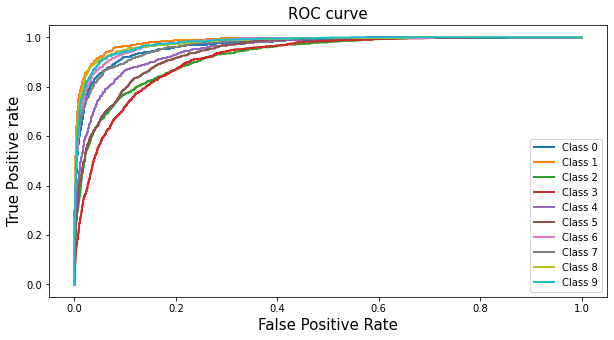

In [ ]:
fpr = {}
tpr = {}
thres ={}
n_class = 10

pred_prob = model.predict(x_test) 

for i in range(n_class): 
    fpr[i], tpr[i], thres[i] = roc_curve(y_tst_org, pred_prob[:,i], pos_label=i)

figure = plt.figure(figsize=(10, 5))

plt.plot(fpr[0], tpr[0],linewidth = 2, label='Class 0')
plt.plot(fpr[1], tpr[1],linewidth = 2,label='Class 1')
plt.plot(fpr[2], tpr[2],linewidth = 2,label='Class 2')
plt.plot(fpr[3], tpr[3],linewidth = 2,label='Class 3')
plt.plot(fpr[4], tpr[4],linewidth = 2, label='Class 4')
plt.plot(fpr[5], tpr[5],linewidth = 2, label='Class 5')
plt.plot(fpr[6], tpr[6],linewidth = 2,label='Class 6')
plt.plot(fpr[7], tpr[7],linewidth = 2,label='Class 7')
plt.plot(fpr[8], tpr[8],linewidth = 2,label='Class 8')
plt.plot(fpr[9], tpr[9],linewidth = 2, label='Class 9')

plt.title('ROC curve',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive rate',fontsize = 15)
plt.legend(loc='best',fontsize = 10)

plt.show()